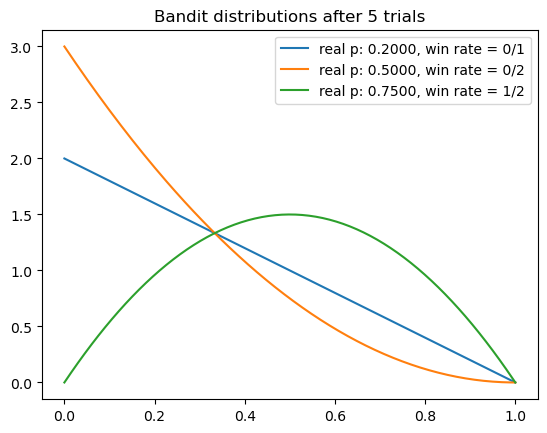

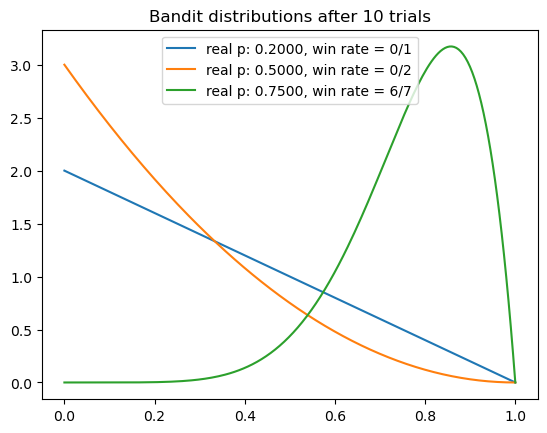

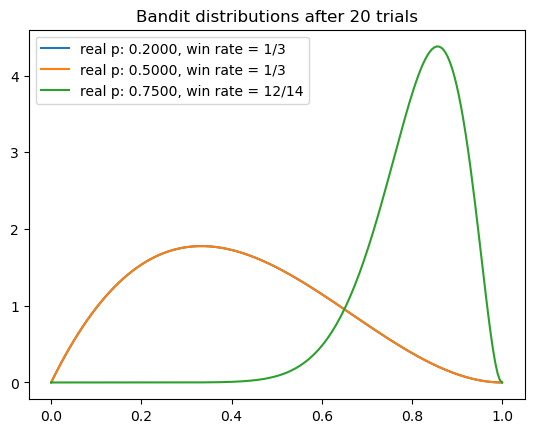

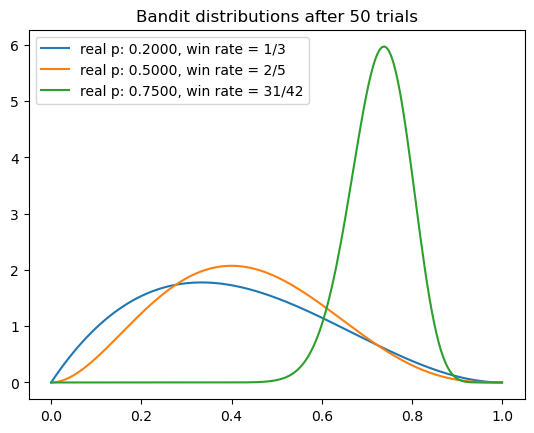

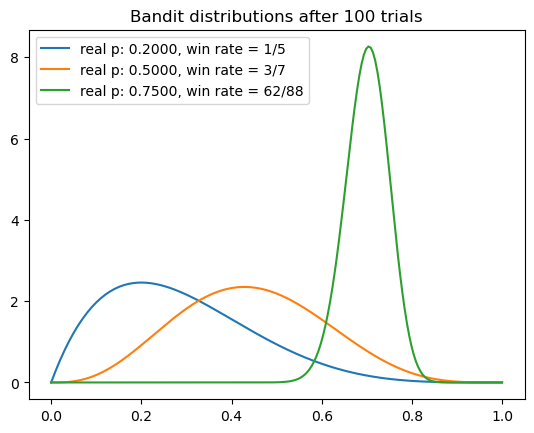

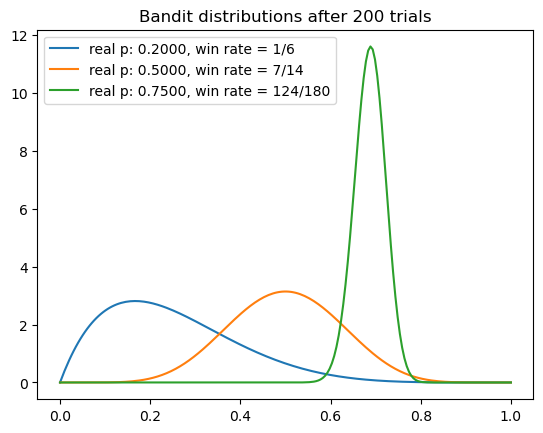

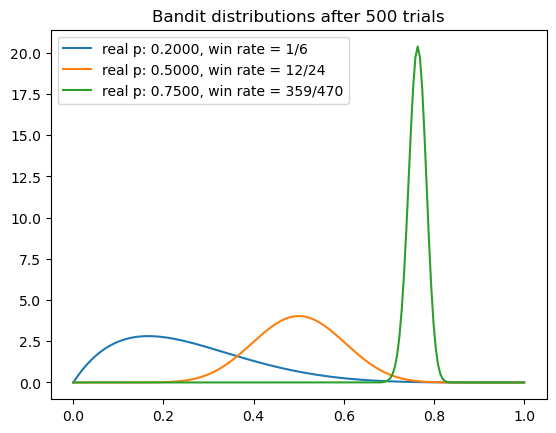

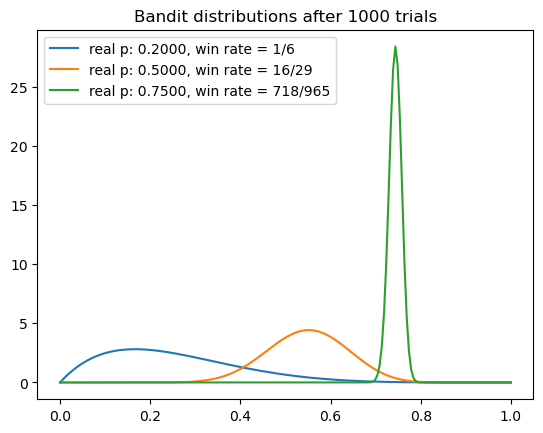

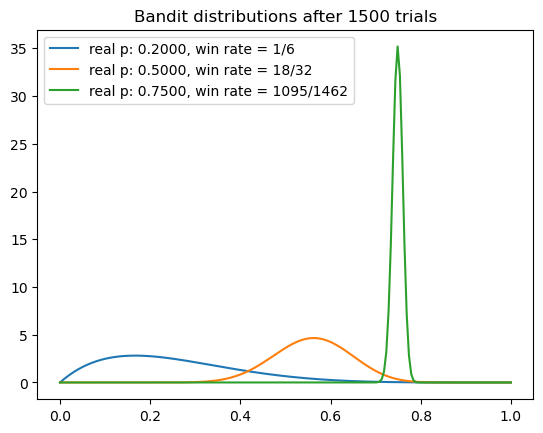

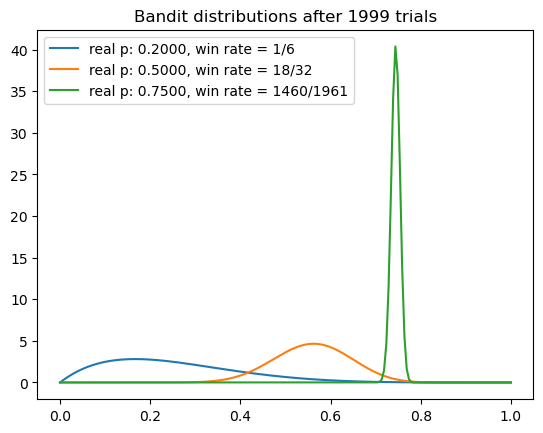

total reward earned: 1479.0
overall win rate: 0.7395
num times selected each bandit: [6, 32, 1962]


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

NUM_TRIALS = 2000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

def pull_bandit(p):
    return np.random.random() < p

def update_beta_params(a, b, x):
    a += x
    b += 1 - x
    return a, b

def thompson_sampling(bandits):
    samples = [np.random.beta(b["a"], b["b"]) for b in bandits]
    return np.argmax(samples)

def plot_bandit_distributions(bandits, trial):
    x = np.linspace(0, 1, 200)
    for b in bandits:
        y = beta.pdf(x, b["a"], b["b"])
        plt.plot(x, y, label=f"real p: {b['p']:.4f}, win rate = {b['a'] - 1}/{b['N']}")
    plt.title(f"Bandit distributions after {trial} trials")
    plt.legend()
    plt.show()

def experiment():
    bandits = [{"p": p, "a": 1, "b": 1, "N": 0} for p in BANDIT_PROBABILITIES]
    sample_points = [5, 10, 20, 50, 100, 200, 500, 1000, 1500, 1999]
    rewards = np.zeros(NUM_TRIALS)

    for i in range(NUM_TRIALS):
        # Thompson sampling
        j = thompson_sampling(bandits)

        # plot the posteriors
        if i in sample_points:
            plot_bandit_distributions(bandits, i)

        # pull the arm for the bandit with the largest sample
        x = pull_bandit(bandits[j]["p"])

        # update rewards
        rewards[i] = x

        # update the distribution for the bandit whose arm we just pulled
        bandits[j]["a"], bandits[j]["b"] = update_beta_params(bandits[j]["a"], bandits[j]["b"], x)
        bandits[j]["N"] += 1

    # print total reward
    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / NUM_TRIALS)
    print("num times selected each bandit:", [b["N"] for b in bandits])

if __name__ == "__main__":
    experiment()


Certainly! This code is an implementation of the Thompson Sampling algorithm for solving the multi-armed bandit problem. Let me explain each part of the code:

Import Statements:

The code begins with import statements to bring in necessary libraries, including NumPy for numerical operations, Matplotlib for plotting, and SciPy's beta distribution for Bayesian sampling.
Constants and Parameters:

NUM_TRIALS: The number of trials or time steps in the bandit problem.
BANDIT_PROBABILITIES: A list that defines the true probabilities of success for each bandit arm. In this example, there are three arms with success probabilities of 0.2, 0.5, and 0.75.
Functions:

pull_bandit(p): Simulates pulling a bandit arm with a given success probability p. It returns True with probability p and False otherwise.
update_beta_params(a, b, x): Updates the parameters of the Beta distribution representing the bandit's success probability. It takes the current parameters a (successes) and b (failures) and updates them based on the observed reward x.
thompson_sampling(bandits): Performs Thompson sampling to select the arm with the highest sample from the posterior distribution. It returns the index of the selected arm.
plot_bandit_distributions(bandits, trial): Plots the Beta distribution of each bandit after a certain number of trials to visualize their posterior distributions.
Main Function - experiment():

Initializes a list of bandits, where each bandit is represented as a dictionary containing the success probability p, Beta distribution parameters a and b, and the number of times the bandit has been played N.
Defines sample_points to specify at which trial numbers to plot the bandit distributions.
Initializes an array rewards to store the observed rewards for each trial.
Experiment Loop:

The main experiment loop runs for NUM_TRIALS iterations.
Inside the loop:
Thompson sampling is used to select the arm with the highest sample from the posterior distribution.
If the current trial number is in sample_points, the code plots the bandit distributions to visualize the Bayesian updates.
The selected arm is pulled, and the reward is observed and stored in the rewards array.
The Beta distribution parameters for the selected arm are updated based on the observed reward, and the number of plays for that arm is incremented.
Results:

After the experiment loop, the code prints the total reward earned, the overall win rate, and the number of times each bandit arm was selected.
Running the Experiment:

The code checks if it is being run as the main script (if __name__ == '__main__':) and calls the experiment() function to run the bandit problem using Thompson Sampling.
Thompson Sampling is a Bayesian approach to solving the multi-armed bandit problem. It maintains a Beta distribution for each bandit, representing the uncertainty in the bandit's success probability. The algorithm selects arms with the highest samples from the posterior distributions, effectively balancing exploration and exploitation. The code provides visualizations of the bandit distributions at specific time points to show how the algorithm updates its beliefs about the bandits over time.





